# 可视化数据的分类能力 
使用 PCA 探索数据对类的分离程度

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

### Dataset

In [3]:
cancer = load_breast_cancer()

data = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
data['y'] = cancer['target']

print(data.columns)
print(len(data))
data.head()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'y'],
      dtype='object')
569


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
# Infomation values

import information_value as iv

features = data.columns
for f in features:
    iv_ = iv.calc_iv(data,f,'y')
    print("{}: {}".format(f,round(iv_,2)))

/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mean radius: 0.03


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mean texture: 0.04


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mean perimeter: 0.01


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mean area: 0.01


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mean smoothness: 0.08


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mean compactness: 0.02


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mean concavity: 0.0


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mean concave points: 0.0


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mean symmetry: 0.11


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mean fractal dimension: 0.04


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


radius error: 0.01


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


texture error: 0.04


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


perimeter error: 0.01


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


area error: 0.01


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


smoothness error: 0.0


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


compactness error: 0.01


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


concavity error: 0.01


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


concave points error: 0.02


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


symmetry error: 0.04


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


fractal dimension error: 0.01


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


worst radius: 0.01


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


worst texture: 0.03


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


worst perimeter: 0.01


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


worst area: 0.0


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


worst smoothness: 0.07


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


worst compactness: 0.02


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


worst concavity: 0.01


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


worst concave points: 0.02


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


worst symmetry: 0.03
worst fractal dimension: 0.02
y: 0.0


/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/du/miniforge3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


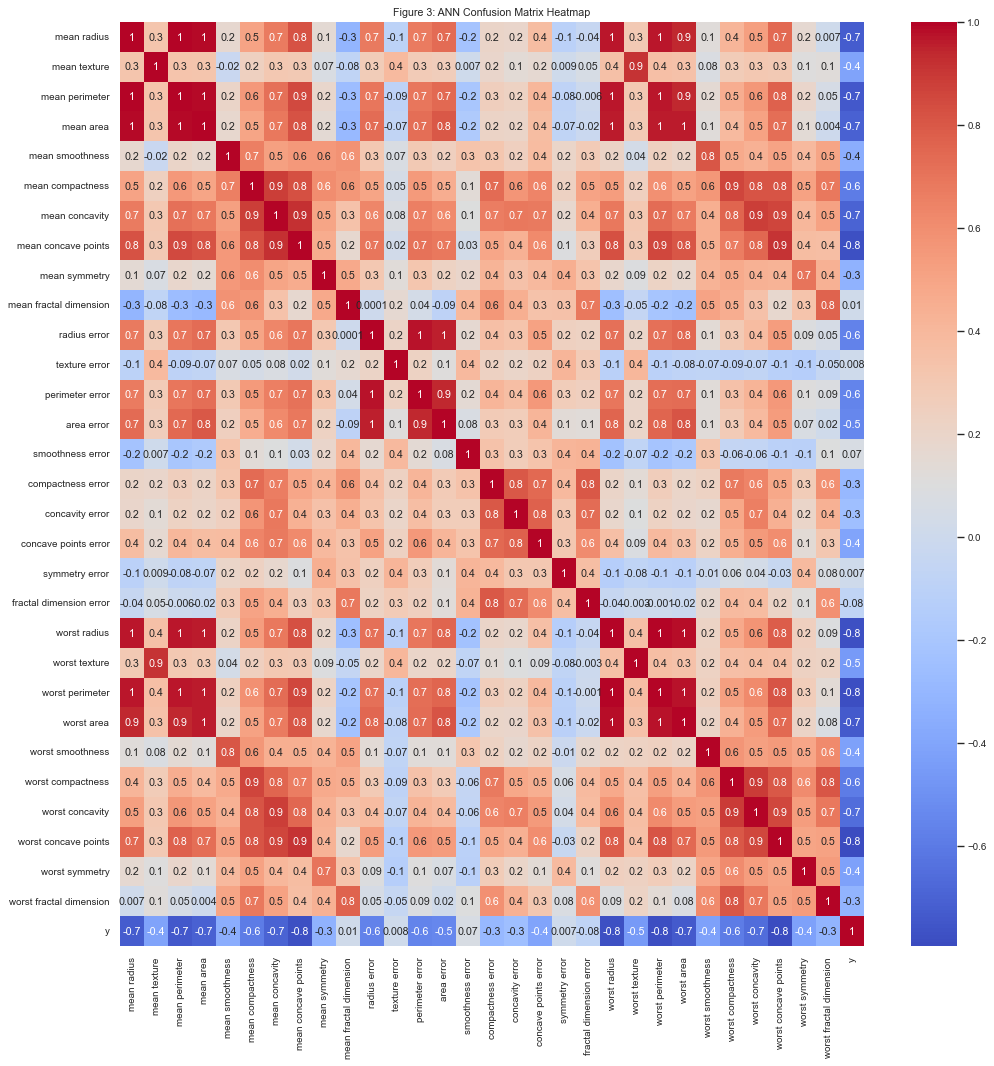

In [8]:
# Correlation Matrix
mat = data[features].corr()
test_data = pd.DataFrame(mat,columns=features,index=features)

plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
sns.set(font_scale=0.8)
ax = plt.axes()
sns.heatmap(mat,cmap='coolwarm',ax=ax,annot=True,fmt='.0g')
ax.set_title('Figure 3: ANN Confusion Matrix Heatmap')
plt.show()

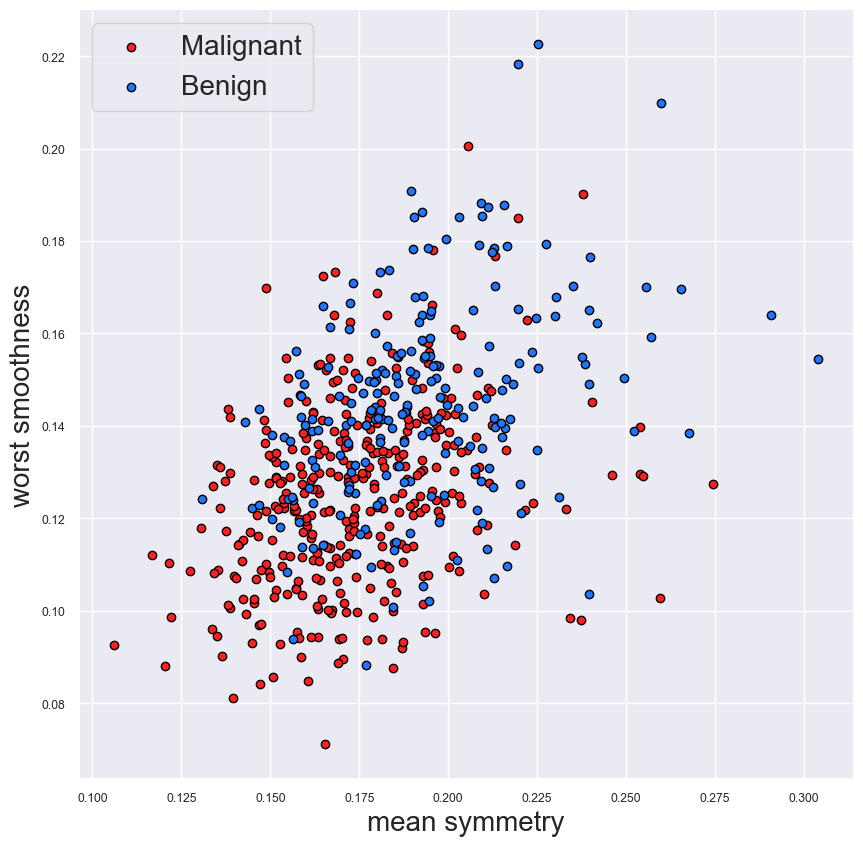

In [9]:
plt.figure(figsize=(10,10))

plt.scatter('mean symmetry','worst smoothness',c='#ff2121',edgecolors='#000000',data=data[data.y == 1])
plt.scatter('mean symmetry','worst smoothness',c='#2176ff',edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("worst smoothness",size=20)
plt.xlabel('mean symmetry',size=20)
plt.legend(['Malignant','Benign'],loc =2,prop={"size":20})

plt.savefig('../figures/pca1.png',format='png')

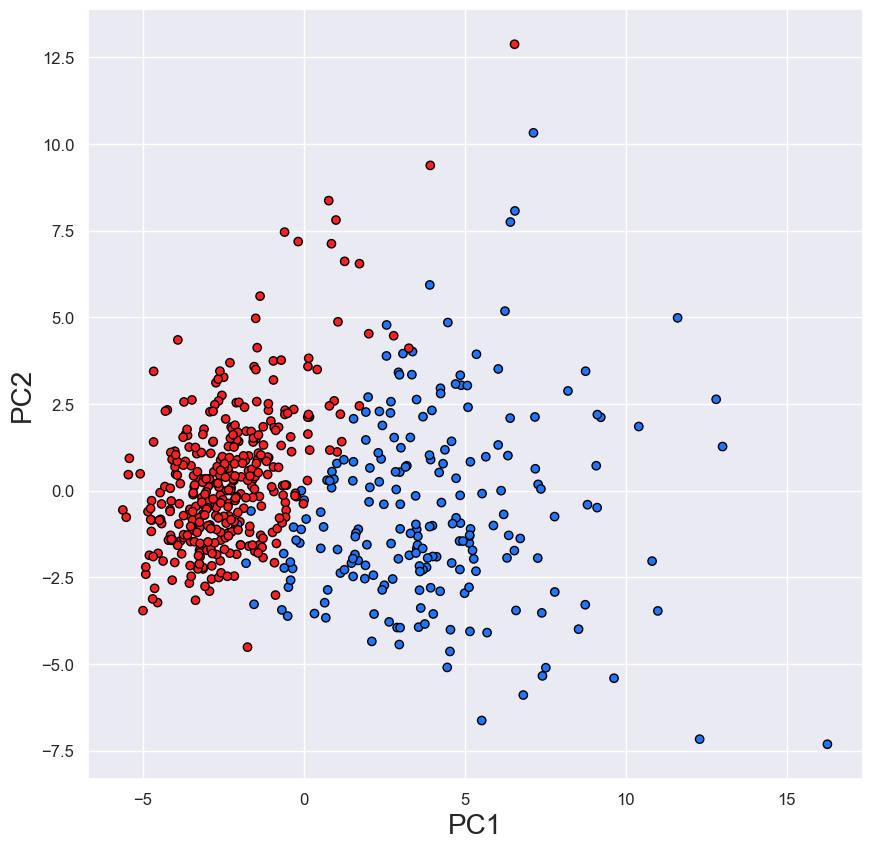

In [10]:
# Scale the data
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)

# Obtain principal components
pca = PCA().fit(scaled)

pc = pca.transform(scaled)
pc1 = pc[:,0]
pc2 = pc[:,1]

# Plot principal components
plt.figure(figsize=(10,10))

colour = ['#ff2121' if y == 1 else '#2176ff' for y in data['y']]
plt.scatter(pc1,pc2 ,c=colour,edgecolors='#000000')
plt.ylabel("Glucose",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.savefig('../figures/pca2.png',format='png')

19.678707842971903


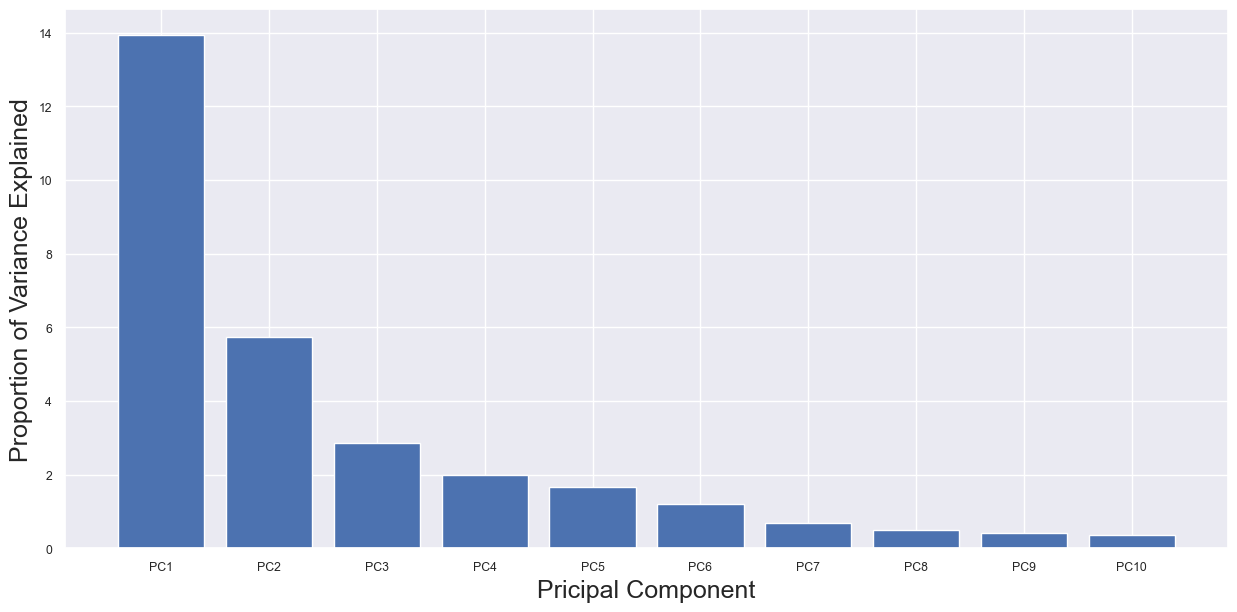

In [11]:
var = pca.explained_variance_[0:10] # percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

plt.figure(figsize=(15,7))
plt.bar(labels,var,)
plt.xlabel('Pricipal Component', fontsize=18)
plt.ylabel('Proportion of Variance Explained', fontsize=18)

print(var[0]+ var[1])
plt.savefig('../figures/pca_scree.png',format='png')

### PCA -  Groups

In [12]:
group_1 = ['mean smoothness','smoothness error','worst smoothness',
           'mean symmetry', 'symmetry error','worst symmetry']

group_2 = ['mean perimeter','perimeter error','worst perimeter', 
           'mean concavity','concavity error','worst concavity']

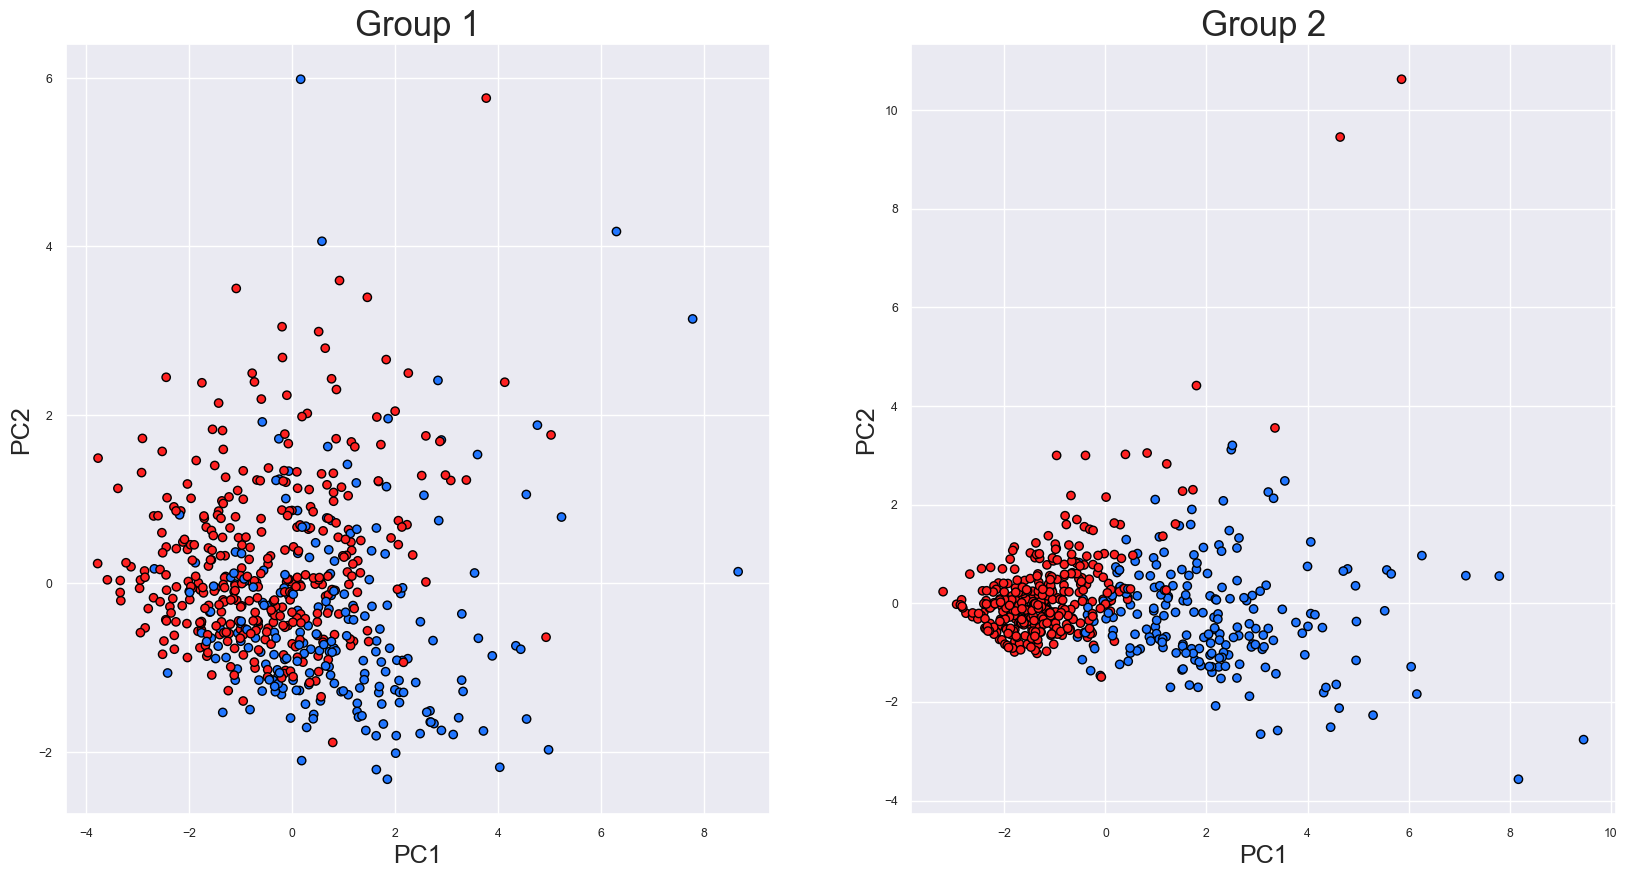

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

group = [group_1,group_2]

for i,g in enumerate(group):

    # Scale the data
    scaler = StandardScaler()
    scaler.fit(data[g])
    scaled = scaler.transform(data[g])


    # Obtain principal components
    pca = PCA().fit(scaled)

    pc = pca.transform(scaled)
    pc1 = pc[:,0]
    pc2 = pc[:,1]

    # Plot principal components


    ax[i].scatter(pc1,pc2 ,c=colour,edgecolors='#000000')
    ax[i].set_title('Group {}'.format(i+1), fontsize=25)
    ax[i].set_xlabel('PC1', fontsize=18)
    ax[i].set_ylabel('PC2', fontsize=18)

plt.savefig('../figures/pca_group.png',format='png')

In [14]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metric
import statsmodels.api as sm

for i,g in enumerate(group):

    x = data[g]
    x = sm.add_constant(x)
    y = data['y']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)

    model = sm.Logit(y_train,x_train).fit() # fit logistic regression model

    predictions = np.around(model.predict(x_test)) 
    accuracy = metric.accuracy_score(y_test,predictions)
    
    print("Accuracy of Group {}: {}".format(i+1,accuracy))



Optimization terminated successfully.
         Current function value: 0.458884
         Iterations 7
Accuracy of Group 1: 0.7368421052631579
Optimization terminated successfully.
         Current function value: 0.103458
         Iterations 10
Accuracy of Group 2: 0.9707602339181286
